In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
def load_df(fp):
    df = pd.read_csv(fp, names=['Function', 'Container', 'K', 'T', 'time_ns'], header=0)
    df['time_us'] = df.time_ns / 1000
    return df

In [4]:
HMMBase_df = load_df('HMMBase/HMMBase_v0.0.10_1552295312_2019.csv')
HMMBase_df.head()

,Function,Container,K,T,time_ns,time_us
0,rand,Array,2,10,2747.1,2.7471
1,rand,Array,2,10,2770.4,2.7704
2,rand,Array,2,10,2782.0,2.7820
3,rand,Array,2,10,2785.9,2.7859
4,rand,Array,2,10,2791.1,2.7911


In [5]:
hmmlearn_df = load_df('hmmlearn/hmmlearn_v0.2.1_1552295485_2019.csv')
hmmlearn_df.head()

,Function,Container,K,T,time_ns,time_us
0,sample,np.array,2,10,1823559,1823.559
1,sample,np.array,2,10,1287531,1287.531
2,sample,np.array,2,10,1246795,1246.795
3,sample,np.array,2,10,1254190,1254.190
4,sample,np.array,2,10,1232721,1232.721


In [6]:
def plot_time_vs_k(df, functions):
    # TODO: Default figure size
    # TODO: Display n_samples
    sns.lineplot(x='K', y='time_us', hue='Container', style='Function', data=df[(df['T'] == 1000) & (df['Function'].isin(functions))])
    plt.xticks(sorted(df.K.unique()));
    plt.ylabel('Time (µs)')

In [7]:
def plot_time_vs_T(df, functions):
    # TODO: Default figure size
    # TODO: Display n_samples
    sns.lineplot(x='T', y='time_us', hue='Container', style='Function', data=df[(df['K'] == 10) & (df['Function'].isin(functions))])
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(sorted(df['T'].unique()));
    plt.ylabel('Time (µs)')

/home/maxmouchet/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'hmmlearn')

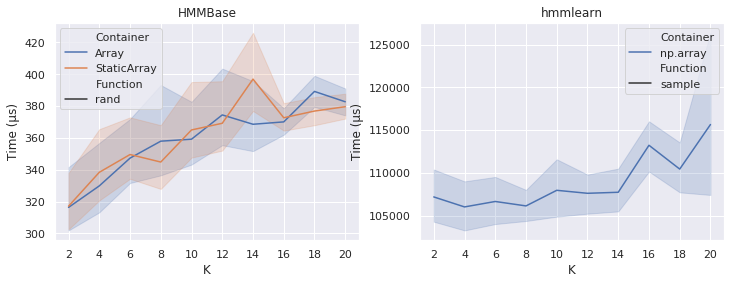

In [8]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase_df, ['rand'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_k(hmmlearn_df, ['sample'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

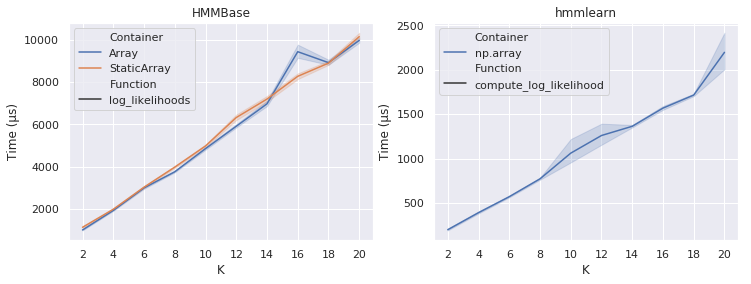

In [9]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase_df, ['log_likelihoods'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_k(hmmlearn_df, ['compute_log_likelihood'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

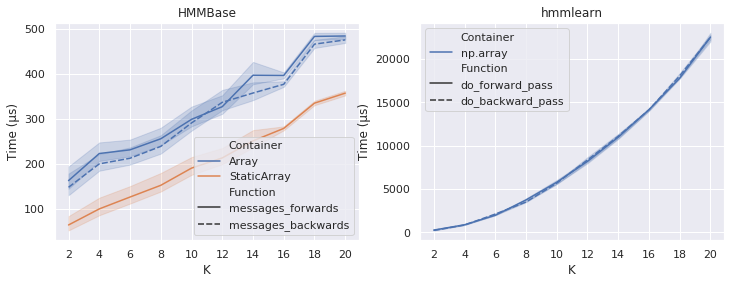

In [10]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_k(hmmlearn_df, ['do_forward_pass', 'do_backward_pass'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

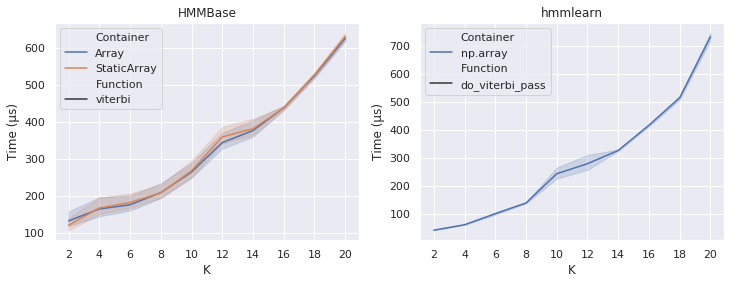

In [11]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_k(HMMBase_df, ['viterbi'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_k(hmmlearn_df, ['do_viterbi_pass'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

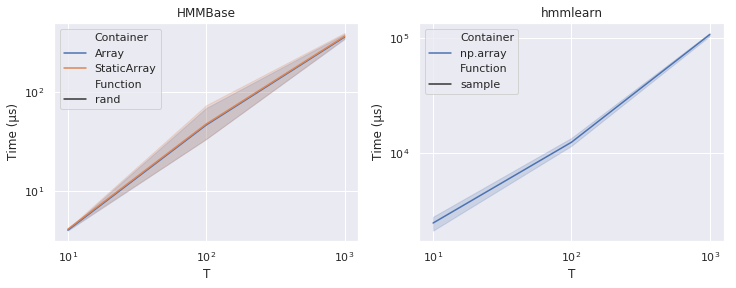

In [12]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase_df, ['rand'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(hmmlearn_df, ['sample'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

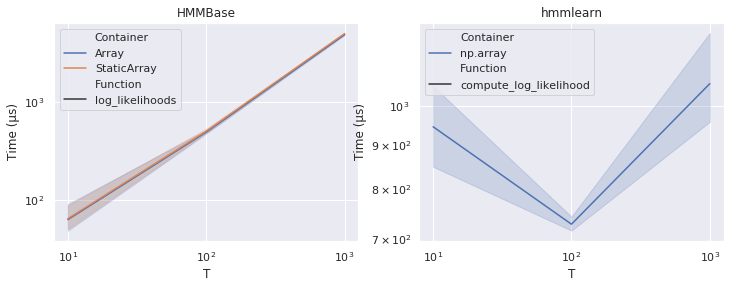

In [13]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase_df, ['log_likelihoods'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(hmmlearn_df, ['compute_log_likelihood'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

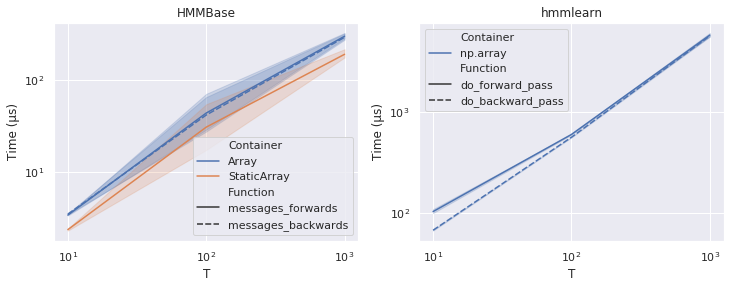

In [14]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase_df, ['messages_forwards', 'messages_backwards'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(hmmlearn_df, ['do_forward_pass', 'do_backward_pass'])
plt.title('hmmlearn')

Text(0.5, 1.0, 'hmmlearn')

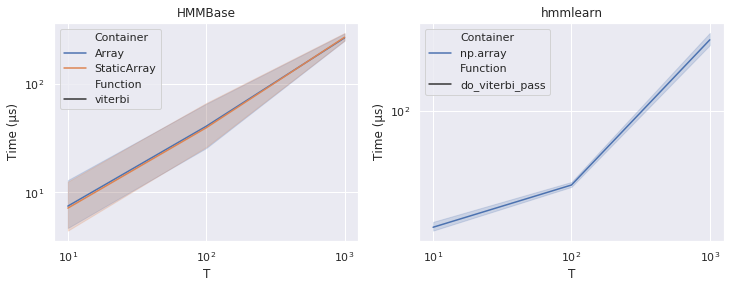

In [15]:
plt.figure(figsize=(12,4))

plt.subplot('121')
plot_time_vs_T(HMMBase_df, ['viterbi'])
plt.title('HMMBase')

plt.subplot('122')
plot_time_vs_T(hmmlearn_df, ['do_viterbi_pass'])
plt.title('hmmlearn')

### Summary

In [92]:
def get_median_time(df, function, container, K, T):
    return df[(df.Function == function) & (df.K == K) & (df['T'] == T) & (df.Container == container)].time_us.median()/1000

In [93]:
agg = []
agg.append(('Forward Pass', 'HMMBase (Array)', get_median_time(HMMBase_df, 'messages_forwards', 'Array', 10, 1000)))
agg.append(('Forward Pass', 'HMMBase (StaticArray)', get_median_time(HMMBase_df, 'messages_forwards', 'StaticArray', 10, 1000)))
agg.append(('Forward Pass', 'hmmlearn', get_median_time(hmmlearn_df, 'do_forward_pass', 'np.array', 10, 1000)))
agg.append(('Backward Pass', 'HMMBase (Array)', get_median_time(HMMBase_df, 'messages_forwards', 'Array', 10, 1000)))
agg.append(('Backward Pass', 'HMMBase (StaticArray)', get_median_time(HMMBase_df, 'messages_forwards', 'StaticArray', 10, 1000)))
agg.append(('Backward Pass', 'hmmlearn', get_median_time(hmmlearn_df, 'do_forward_pass', 'np.array', 10, 1000)))
agg.append(('Viterbi', 'HMMBase (Array)', get_median_time(HMMBase_df, 'viterbi', 'Array', 10, 1000)))
agg.append(('Viterbi', 'HMMBase (StaticArray)', get_median_time(HMMBase_df, 'viterbi', 'StaticArray', 10, 1000)))
agg.append(('Viterbi', 'hmmlearn', get_median_time(hmmlearn_df, 'do_viterbi_pass', 'np.array', 10, 1000)))
agg.append(('Likelihood', 'HMMBase (Array)', get_median_time(HMMBase_df, 'log_likelihoods', 'Array', 10, 1000)))
agg.append(('Likelihood', 'HMMBase (StaticArray)', get_median_time(HMMBase_df, 'log_likelihoods', 'StaticArray', 10, 1000)))
agg.append(('Likelihood', 'hmmlearn', get_median_time(hmmlearn_df, 'compute_log_likelihood', 'np.array', 10, 1000)))
agg_df = pd.DataFrame.from_records(agg, columns=['Function', 'Implementation', 'time_us'])

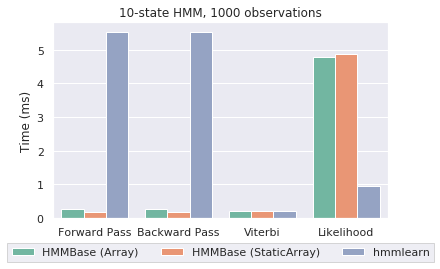

In [109]:
sns.barplot(x='Function', y='time_us', hue='Implementation', data=agg_df, palette='Set2')
plt.xlabel('')
plt.ylabel('Time (ms)')
plt.title('10-state HMM, 1000 observations')

# https://stackoverflow.com/a/4701285
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=False, shadow=False, ncol=3)

plt.savefig('benchmark_summary.png', dpi=300)